In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns


## ML Suite ##
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import skew
from scipy.cluster.vq import kmeans,vq,whiten
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import rc, font_manager
ticks_font4 = font_manager.FontProperties(family='serif', style='normal', size=28, weight='bold', stretch='normal')
ticks_font3 = font_manager.FontProperties(family='serif', style='normal', size=20, weight='bold', stretch='normal')
ticks_font = font_manager.FontProperties(family='serif', style='normal', size=44, weight='bold', stretch='normal')
ticks_font2 = font_manager.FontProperties(family='serif', style='normal', size=64, weight='bold', stretch='normal')

In [3]:
## Import the main ML dataframes ##
#ONPFDDF = pd.read_csv('LacI_ML_features_ONPF.csv')
#ONPFDDFRNT = pd.read_csv('LacI_ML_features_RNT_ONPF.csv')

DDFRNT = pd.read_csv('LacI_IPTG_MLfeatures_RNT.csv',sep=",") # RNT classified positions
DDFrem = pd.read_csv('LacI_IPTG_MLfeatures_rem.csv',sep=",") # RNT unclassified positions


In [4]:
def standardize_numeric_features(ddf) -> pd.DataFrame:
    var_types = dict(ddf.dtypes != 'O')
    numeric_vars = [var for var, is_numeric in var_types.items() if is_numeric == True]
    for var in numeric_vars:
        var_mean = ddf[var].mean()
        var_std = ddf[var].std()
        ddf[var] = round((ddf[var] - var_mean) / var_std, 6)
    return ddf

In [5]:
# sigmoid function where z = log-odds
def sigmoid(z):
    predict_proba = 1 / (1 + np.exp(-z))
    return predict_proba

In [6]:
np.corrcoef([DDFRNT['ln_unDFI'].values,DDFRNT['Closeness'].values])

array([[ 1.       , -0.8669161],
       [-0.8669161,  1.       ]])

## ML Pipeline ##

In [7]:
DDFRNT_newfeat = np.array(['246Inter', '161unInter', '273unInter_w', 'unIntraw', '274Intra',
       '273Intra', '127unIntra', '220unInter_w', 'unAllent', '273unIntra',
       '69Intra', '246unIntra', 'unInter', '101unIntra_w', '125unIntra',
       '76unInter_w', 'delIntraent_w', 'delInterent', 'lig_Intraent_w',
       'Interw', 'bentB', 'delAllent_w', 'lig_Allent', 'delAll_w',
       '193unInter_w', '125unInter_w', '75Inter_w', '197Intra',
       '79Inter_w', '75Inter', '161Intra', '73unInter', '293unIntra_w',
       '75unIntra', '149Inter', 'delInterw', 'unInterent_w',
       '125unIntra_w', '197Inter_w', '127unInter_w', '197unIntra_w',
       'All', '101Intra', '293unInter_w', '148unIntra', 'DFIr', 'unentB',
       '274Inter', 'unIntra', '291Inter', 'unentA', '69Inter', '127Inter',
       'delDFIr', '149Inter_w', 'unrecDFI', 'lig_Interent', 'lig_Inter_w',
       '293Intra_w', '296Inter', '69unInter_w', '161Inter', '246Intra',
       'Allent', 'delInter', '193unInter', 'lig_Interw', '291unInter_w',
       '273Inter', '220Intra', '161unIntra', 'lig_Allent_w', '148Inter',
       '127Intra_w', '191Inter', '69unIntra_w', 'delInterent_w',
       'delIntraw', '125Inter', 'unInterw', 'bentA', '125Inter_w',
       'unAll', 'Intra', '291unIntra_w', '161unInter_w', '161unIntra_w',
       '148Intra', '293unIntra', '79unInter_w', '296unIntra',
       '273Inter_w', '69Intra_w', '274unInter_w', '148unInter_w',
       '79unIntra_w', '125unInter', '149unIntra_w', '148Inter_w',
       '273unInter', '73unInter_w', '76unIntra', '148Intra_w',
       '197Intra_w', '127unIntra_w', 'Inter_w', '101Intra_w', '69unInter',
       'unIntraent_w', 'lig_Interent_w', 'Inter', '246Inter_w',
       '75unIntra_w', '193unIntra', '191unIntra_w', 'delAll', 'Interent',
       'delInter_w', 'Intraent_w', '101unIntra', '75Intra_w',
       '274unIntra_w', '125Intra', 'delAllent', '193unIntra_w',
       '296unInter', '191unInter', '220unIntra', 'delIntra_w',
       '73Inter_w', '246unInter', '148unInter', '101Inter_w', 'lig_Inter',
       '291Inter_w', 'delIntra', '273Intra_w', '191unInter_w',
       '76Intra_w', 'bVent', '101unInter', 'DFI', 'Intra_w',
       'lig_Intraent', '193Inter_w', '293unInter', '125Intra_w', 'recDFI',
       '76unInter', '273unIntra_w', '248Inter_w', '291Intra_w',
       '220unInter', '149unIntra', '127Inter_w', 'Allent_w', '197Inter',
       '293Inter_w', '291unInter', '248Inter', '161Inter_w', '220Intra_w',
       'unDFIr', '149Intra_w', 'unAllent_w', '101Inter', '75unInter_w',
       '246Intra_w', '197unInter', '127unInter', 'delDFI', '291Intra',
       '191Intra', '75unInter', 'lig_Intraw', '191unIntra', 'lig_All_w',
       '161Intra_w', 'unIntra_w', '274Inter_w', '191Inter_w',
       '291unIntra', '79Inter', '79unIntra', '296Inter_w', '76unIntra_w',
       '248unInter_w', '296Intra', 'Intraw', '274unIntra', '193Inter',
       '148unIntra_w', '248unInter', '191Intra_w', 'bentR', '79Intra',
       '246unInter_w', 'lig_All', 'delentA', '149unInter', '248unIntra',
       '79unInter', '197unIntra', 'unIntraent', '220Inter_w',
       'Interent_w', '75Intra', '127Intra', '69unIntra', 'All_w',
       '274unInter', '274Intra_w', '73unIntra', '76Inter', 'delVent',
       'delentB', '296unInter_w', '149Intra', 'delent', 'lig_Intra_w',
       '149unInter_w', '248Intra_w', 'delIntraent', '197unInter_w',
       'unentR', '248Intra', 'delrecDFI', 'unAll_w', '79Intra_w',
       '193Intra_w', '193Intra', 'unInter_w', '293Intra', '220Inter',
       'unDFI', '248unIntra_w', 'Intraent', '296unIntra_w', 'lig_Intra',
       '73unIntra_w', '73Intra', '73Intra_w', '246unIntra_w', '76Inter_w',
       '76Intra', '101unInter_w', '220unIntra_w', '69Inter_w', '293Inter',
       '73Inter', 'unInterent'])
allnet=np.array(['Degree', 'Cluster_Coeff', 'Closeness', 'Betweenness', 'Eigenvec',
       'Eccentricity', 'AvgNeighDegr', 'Degreer', 'Cluster_Coeffr',
       'Closenessr', 'Betweennessr', 'Eigenvecr', 'Eccentricityr',
       'AvgNeighDegrr', 'DegreeB', 'Cluster_CoeffB', 'ClosenessB',
       'BetweennessB', 'EigenvecB', 'EccentricityB', 'AvgNeighDegrB',
       'DegreeBr', 'Cluster_CoeffBr', 'ClosenessBr', 'BetweennessBr',
       'EigenvecBr', 'EccentricityBr', 'AvgNeighDegrBr', 'delDegree',
       'delCluster_Coeff', 'delCloseness', 'delBetweenness', 'delEigenvec',
       'delEccentricity', 'delAvgNeighDegr', 'delDegreer', 'delCluster_Coeffr',
       'delClosenessr', 'delBetweennessr', 'delEigenvecr', 'delEccentricityr',
       'delAvgNeighDegrr'])


In [8]:
def getprobs(FEATs, dataF, ITERS=100):
    DFX=dataF
    C1 = np.hstack([FEATs, asafeats])
    C2 = ['WREC50label']


    #X = DDF[C1]
    data = DFX[C1]
    y = DFX[C2]
    scaler = StandardScaler()
    scaler.fit(data)
    X = scaler.transform(data)


    iters=ITERS
    allprob=[]
    for i in range(1,iters+1):
        Xt, Xv, Yt, Yv = train_test_split(X, y, test_size=0.20)
        Y_train=Yt
        X_train = Xt

        LR = LogisticRegression(solver='liblinear', multi_class='ovr')
        LR.fit(X_train, Y_train)
        Prob=[]
        for i in range(len(X)):
            #xx = DFtest.loc[DFtest['ResI']==i][DDF_features]
            #x=xx.values[0]
            log_odds = sum(LR.coef_[0] * X[i])+LR.intercept_[0]
            y_pred_proba = sigmoid(log_odds)
            Prob.append(y_pred_proba)
        allprob.append(Prob)
    DFX['Prob1'] = np.mean(allprob, axis=0)
    DFX['allProb'] = np.mean(allprob, axis=0)
    aDF = DFX.loc[DFX['Prob1'] >= 0.5]
    ntp = len(aDF.loc[aDF['WREC50'] >= 0.5])
    sumtp = np.sum(DFX.loc[DFX['WREC50'] >=0.5]['Prob1'].values)
    print('%s %s %s' % (FEATs, ntp, sumtp))
    
    return ntp, sumtp


## Calculate Prob and AUC using single neutral feature 

Logistic: ROC AUC=0.860


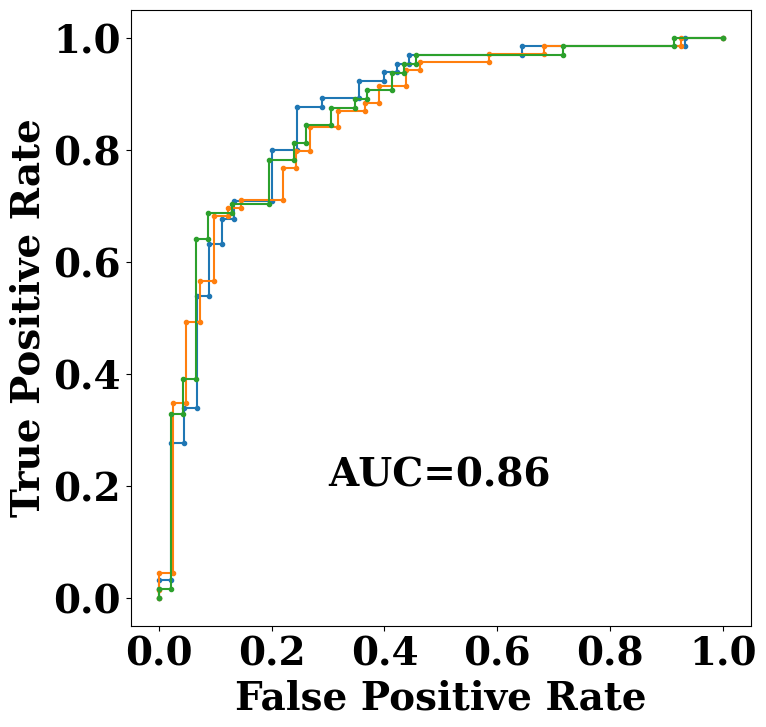

Train Accuracy : 0.82
Test Accuracy : 0.79


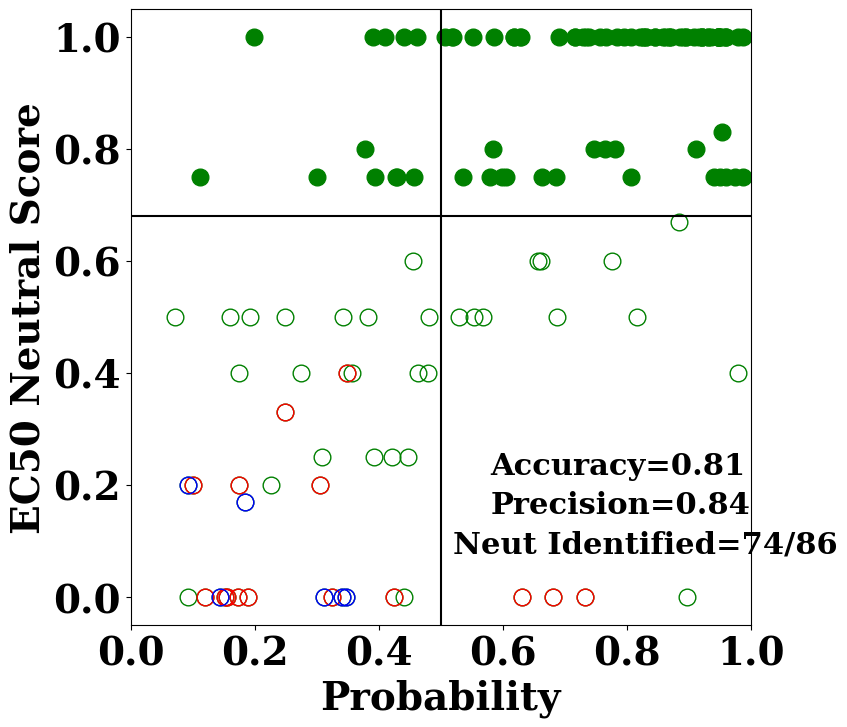

In [28]:

TPR=[]
FPR=[]
TNR=[]
FNR=[]
#C1 = ['ln_unDFI']
C1 = ['Closeness']
#C1Y = netfeats
#C1 = np.hstack([C1X,C1Y])
#C1 = allnet[2:3]
C2 = ['NEC50label']


data = DDFRNT[C1]
y = DDFRNT[C2]
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)


iters=500
nfpr = []
ntpr = []
lfpr = []
ltpr = []
lrauc = []
for i in range(1,iters+1):
    Xt, Xv, Yt, Yv = train_test_split(X, y, test_size=0.20)
    Y_train = Yt
    X_train = Xt
    ns_probs = [0 for _ in range(len(Y_train))]
    
    LR = LogisticRegression(solver='liblinear', multi_class='ovr')
    LR.fit(X_train, Y_train)
    
    lr_probs = LR.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(Y_train, ns_probs)
    lr_auc = roc_auc_score(Y_train, lr_probs)
    # summarize scores
    #print('Logistic: ROC AUC=%.3f' % (lr_auc))
    lrauc.append(lr_auc)
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(Y_train, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y_train, lr_probs)
    nfpr.append(ns_fpr)
    ntpr.append(ns_tpr)
    lfpr.append(lr_fpr)
    ltpr.append(lr_tpr)
    # plot the roc curve for the model
    #pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    #pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    #pyplot.xlabel('False Positive Rate')
    #pyplot.ylabel('True Positive Rate')
    # show the legend
    #pyplot.legend()
    # show the plot
    #pyplot.show()
# plot the roc curve for the model
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (np.mean(lrauc)))
auctxt = np.round(np.mean(lrauc),decimals=2)
fig = plt.figure(figsize=(8, 8))
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lfpr[0], ltpr[0], marker='.', label='Logistic1')
pyplot.plot(lfpr[1], ltpr[1], marker='.', label='Logistic2')
pyplot.plot(lfpr[2], ltpr[2], marker='.', label='Logistic3')
# axis labels
pyplot.xlabel('False Positive Rate', fontproperties=ticks_font4)
pyplot.ylabel('True Positive Rate', fontproperties=ticks_font4)
plt.yticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.xticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.text(0.3, 0.2, 'AUC=%s'%(auctxt), fontname = "serif", fontsize=28, fontweight='bold')
# show the legend
#pyplot.legend()
# show the plot
#plt.savefig('NEC50_stfeats_AUC.svg')

pyplot.show()

LR = LogisticRegression(solver='liblinear', multi_class='ovr')
LR.fit(X_train, Y_train)
print('Train Accuracy : %.2f'%LR.score(X_train, Y_train))
print('Test Accuracy : %.2f'%LR.score(Xv, Yv))

data2 = DDFrem[C1]
#y = DFVRNT[C2]
#scaler = StandardScaler()
scaler.fit(data2)
X2 = scaler.transform(data2)

iters=5000
allprob=[]
allprob2=[]
for i in range(1,iters+1):
    Xt, Xv, Yt, Yv = train_test_split(X, y, test_size=0.20)
    Y_train=Yt
    X_train = Xt
    
    LR = LogisticRegression(solver='liblinear', multi_class='ovr')
    LR.fit(X_train, Y_train)
    Prob=[]
    for i in range(len(X)):
        #xx = DFtest.loc[DFtest['ResI']==i][DDF_features]
        #x=xx.values[0]
        log_odds = sum(LR.coef_[0] * X[i])+LR.intercept_[0]
        y_pred_proba = sigmoid(log_odds)
        Prob.append(y_pred_proba)
    Prob2=[]
    for i in range(len(X2)):
        #xx = DFtest.loc[DFtest['ResI']==i][DDF_features]
        #x=xx.values[0]
        log_odds = sum(LR.coef_[0] * X2[i])+LR.intercept_[0]
        y_pred_proba = sigmoid(log_odds)
        Prob2.append(y_pred_proba)
    allprob.append(Prob)
    allprob2.append(Prob2)


DDFrem['Prob2'] = np.mean(allprob2, axis=0)
DDFRNT['Prob'] = np.mean(allprob, axis=0)

P1 = DDFRNT.loc[DDFRNT['Prob']>=0.5]
P0 = DDFRNT.loc[DDFRNT['Prob']<0.5]
            
acc1=len(P1.loc[P1['NEC50label']==1])
acc2=len(P0.loc[P0['NEC50label']==0])
accx1=len(P1.loc[P1['NEC50label']==0])
accx2=len(P0.loc[P0['NEC50label']==1])
accuracy = np.round(((acc1+acc2)/(acc1+acc2+accx1+accx2)), decimals=2)
precision = np.round(((acc1)/(acc1+accx1)), decimals=2)

fig = plt.subplots(figsize=(8, 8))

DDFRNT1 = DDFRNT.loc[DDFRNT['NEC50label']==1]
DDFRNT2 = DDFRNT.loc[DDFRNT['NEC50label']==0]
DDFRNT3 = DDFRNT.loc[DDFRNT['WREC50label']==1]
DDFRNT4 = DDFRNT.loc[DDFRNT['TEC50label2']==1]

plt.plot(DDFRNT1['Prob'], np.round(DDFRNT1['NEC50'], decimals=2),'go', markersize=12)
plt.plot(DDFRNT2['Prob'], np.round(DDFRNT2['NEC50'], decimals=2),'go', mfc='none',markersize=12)
plt.plot(DDFRNT3['Prob'], np.round(DDFRNT3['NEC50'], decimals=2),'ro', mfc='none',markersize=12)
plt.plot(DDFRNT4['Prob'], np.round(DDFRNT4['NEC50'], decimals=2),'bo', mfc='none',markersize=12)

plt.xlabel('Probability', fontproperties=ticks_font4)
plt.ylabel('EC50 Neutral Score', fontproperties=ticks_font4)
#plt.axhline(0.3, color='black')
plt.axhline(0.68, color='black')
plt.axvline(0.5, color='black')
plt.xlim(0,1)
plt.yticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.xticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.text(0.58, 0.22, 'Accuracy=%s'%(accuracy), fontname = "serif", fontsize=22, fontweight='bold')
plt.text(0.58, 0.15, 'Precision=%s'%(precision), fontname = "serif", fontsize=22, fontweight='bold')
plt.text(0.52, 0.08, 'Neut Identified=%s/86'%(acc1), fontname = "serif", fontsize=22, 
         fontweight='bold')
#plt.savefig('NEC50_stfeats_prob_rheocolor.png', dpi=800, bbox_inches='tight')
plt.show()


In [13]:
aa = DDFrem.loc[DDFrem['Prob2'] >= 0.5]
for j in aa.ResI:
    print(j)

2
4
5
6
7
8
9
10
11
12
13
15
16
17
19
20
23
24
26
29
30
31
32
34
35
39
40
45
47
48
50
52
54
55
56
58
59
61
62
91
130
131
135
138
143
151
152
154
155
157
163
166
167
168
169
171
173
174
182
196
198
199
200
201
202
205
206
207
209
210
211
213
217
227
228
229
233
237
243
253
256
257
259
260
262
265
266
267
268
269
270
280
282
283
287
302
303
305
306
307
308
309
310
318
319
320
321
323
324
326


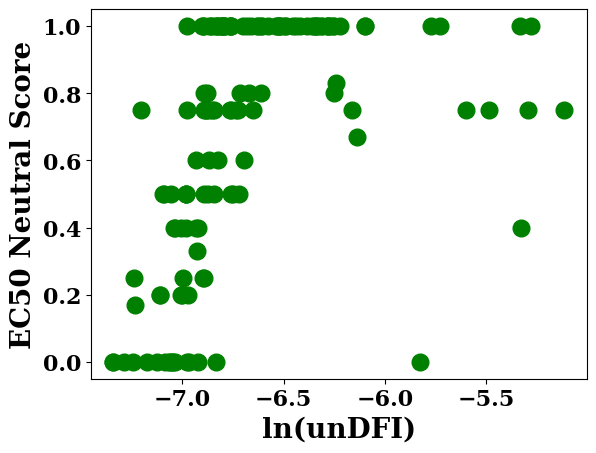

In [95]:

DDFRNT['unDFI'] = np.exp(DDFRNT['ln_unDFI'])
plt.plot(DDFRNT['ln_unDFI'], np.round(DDFRNT['NEC50'], decimals=2),'go', markersize=12)


plt.xlabel('ln(unDFI)', fontproperties=ticks_font3)
plt.ylabel('EC50 Neutral Score', fontproperties=ticks_font3)
#plt.axhline(0.3, color='black')
#plt.axhline(0.68, color='black')
#plt.axvline(0.5, color='black')
#plt.xlim(0,1)
plt.yticks(fontname = "serif", fontsize=16, fontweight='bold')
plt.xticks(fontname = "serif", fontsize=16, fontweight='bold')
#plt.text(0.58, 0.22, 'Accuracy=%s'%(accuracy), fontname = "serif", fontsize=22, fontweight='bold')
#plt.text(0.58, 0.15, 'Precision=%s'%(precision), fontname = "serif", fontsize=22, fontweight='bold')
#plt.text(0.52, 0.08, 'Neut Identified=%s/86'%(acc1), fontname = "serif", fontsize=22, 
#         fontweight='bold')
plt.savefig('NEC50_vs_lnunDFI.png', dpi=800, bbox_inches='tight')
plt.show()

In [11]:
np.corrcoef([DDFRNT['Prob'].values,DDFRNT['NEC50'].values])

array([[1.        , 0.65761573],
       [0.65761573, 1.        ]])

In [29]:
# Trim to sets under a neutral probability of 0.5
DFVRNT=DDFRNT.loc[DDFRNT['Prob'] < 0.5]
DFVrem = DDFrem.loc[DDFrem['Prob2']< 0.5]
#len(DFVRNT.loc[DFVRNT['WREC50label']==1])

In [9]:
df2 = DDFrem.copy()
#df1 = DDFrem.copy()

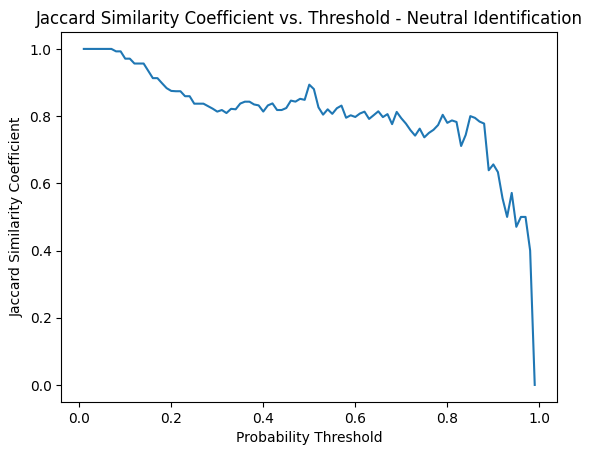

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have two dataframes: df1 and df2

# Create an empty array to store the Jaccard similarity coefficients
jaccard_values = []

# Define the threshold range and increment
threshold_range = np.arange(0.01, 1.01, 0.01)

# Iterate over each threshold value
for threshold in threshold_range:
    # Binarize the dataframes based on the threshold value
    df1_binary = df1['Prob'] > threshold
    df2_binary = df2['Prob'] > threshold
    
    # Calculate the Jaccard similarity coefficient
    intersection = np.sum(df1_binary & df2_binary)
    union = np.sum(df1_binary | df2_binary)
    jaccard_coefficient = intersection / union
    
    # Append the coefficient to the array
    jaccard_values.append(jaccard_coefficient)

# Set the font to Liberation Serif
plt.rcParams['font.family'] = 'Liberation Serif'

# Plot the Jaccard similarity coefficients
plt.plot(threshold_range, jaccard_values)
plt.xlabel('Probability Threshold')
plt.ylabel('Jaccard Similarity Coefficient')
plt.title('Jaccard Similarity Coefficient vs. Threshold - Neutral Identification')

# Save the figure as a PNG file
plt.savefig('jaccard_plot_neutral_identification.png',dpi=800)

# Display the plot
plt.show()






In [30]:
dylistR = ['197unIntra_w','lig_Intraent_w','delentB','248unIntra_w','76Intra','bVent','69Inter',
 '191unInter','Intra_w','unDFIr','101unInter_w','unIntraent']

dylistT = ['lig_Intra_w','193unInter_w','delentB','unDFI','lig_Intraent','bentR','101unInter_w',
 'delDFI','delIntraw','125unIntra','lig_Interent','197unInter','lig_Allent_w']

netlistR = ['AvgNeighDegrBr','Eccentricityr','BetweennessB','Degreer','Closenessr','delCluster_Coeff',
          'delEccentricity','Eigenvecr','EccentricityB','EigenvecB','delDegree','Cluster_Coeff']

netlistT = ['AvgNeighDegr','delEigenvecr','DegreeBr','EigenvecBr','delAvgNeighDegr','BetweennessB',
           'BetweennessBr','Eccentricityr','Eccentricity','Closeness','Eigenvecr','delAvgNeighDegrr',
           'delEccentricity']

Logistic: ROC AUC=0.927


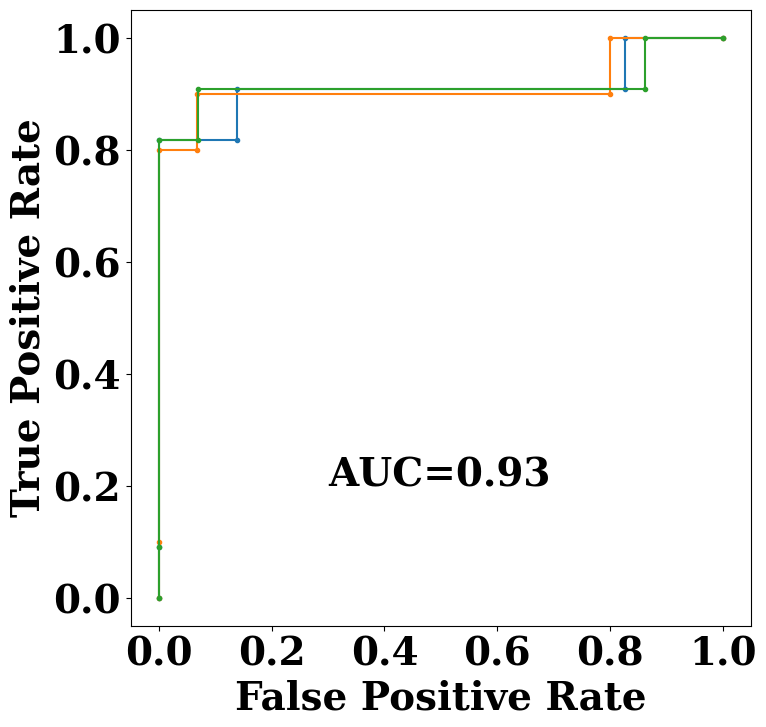

Train Accuracy : 0.95
Test Accuracy : 0.90


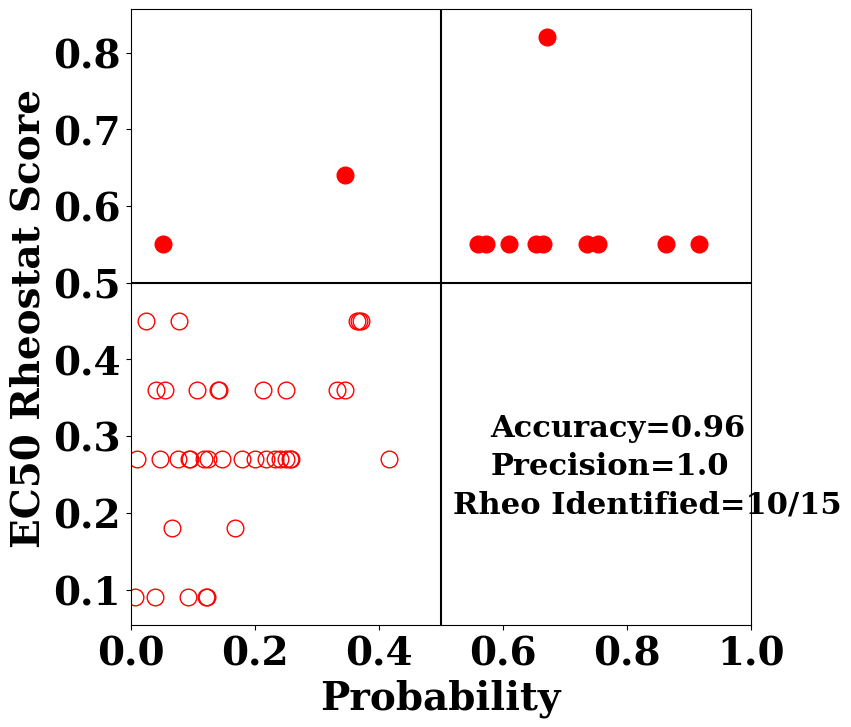

In [31]:

TPR=[]
FPR=[]
TNR=[]
FNR=[]
#C1 = dylistR
C1 = netlistR
#C1Y = netfeats
#C1 = np.hstack([C1X,C1Y])
#C1 = allnet[2:3]
C2 = ['WREC50label']


#X = DDF[C1]
data = DFVRNT[C1]
y = DFVRNT[C2]

scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)


iters=500
nfpr = []
ntpr = []
lfpr = []
ltpr = []
lrauc = []
for i in range(1,iters+1):
    Xt, Xv, Yt, Yv = train_test_split(X, y, test_size=0.20)
    Y_train = Yt
    X_train = Xt
    ns_probs = [0 for _ in range(len(Y_train))]
    
    LR = LogisticRegression(solver='liblinear', multi_class='ovr')
    LR.fit(X_train, Y_train)
    
    lr_probs = LR.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(Y_train, ns_probs)
    lr_auc = roc_auc_score(Y_train, lr_probs)
    # summarize scores
    #print('Logistic: ROC AUC=%.3f' % (lr_auc))
    lrauc.append(lr_auc)
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(Y_train, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y_train, lr_probs)
    nfpr.append(ns_fpr)
    ntpr.append(ns_tpr)
    lfpr.append(lr_fpr)
    ltpr.append(lr_tpr)
    # plot the roc curve for the model
    #pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    #pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    #pyplot.xlabel('False Positive Rate')
    #pyplot.ylabel('True Positive Rate')
    # show the legend
    #pyplot.legend()
    # show the plot
    #pyplot.show()
# plot the roc curve for the model
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (np.mean(lrauc)))
auctxt = np.round(np.mean(lrauc),decimals=2)
fig = plt.figure(figsize=(8, 8))
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lfpr[0], ltpr[0], marker='.', label='Logistic1')
pyplot.plot(lfpr[1], ltpr[1], marker='.', label='Logistic2')
pyplot.plot(lfpr[2], ltpr[2], marker='.', label='Logistic3')
# axis labels
pyplot.xlabel('False Positive Rate', fontproperties=ticks_font4)
pyplot.ylabel('True Positive Rate', fontproperties=ticks_font4)
plt.yticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.xticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.text(0.3, 0.2, 'AUC=%s'%(auctxt), fontname = "serif", fontsize=28, fontweight='bold')
# show the legend
#pyplot.legend()
# show the plot
#plt.savefig('WREC50_dyfeats_AUC.svg')

pyplot.show()

LR = LogisticRegression(solver='liblinear', multi_class='ovr')
LR.fit(X_train, Y_train)
print('Train Accuracy : %.2f'%LR.score(X_train, Y_train))
print('Test Accuracy : %.2f'%LR.score(Xv, Yv))

data2 = DFVrem[C1]
#y = DFVRNT[C2]
scaler = StandardScaler()
scaler.fit(data2)
X2 = scaler.transform(data2)

iters=1000
allprob=[]
allprob2=[]
allcoef=[]
for i in range(1,iters+1):
    Xt, Xv, Yt, Yv = train_test_split(X, y, test_size=0.20)
    Y_train=Yt
    X_train = Xt
    
    LR = LogisticRegression(solver='liblinear', multi_class='ovr')
    LR.fit(X_train, Y_train)
    Prob=[]
    coef=[]
    for i in range(len(X)):
        #xx = DFtest.loc[DFtest['ResI']==i][DDF_features]
        #x=xx.values[0]
        log_odds = sum(LR.coef_[0] * X[i])+LR.intercept_[0]
        y_pred_proba = sigmoid(log_odds)
        Prob.append(y_pred_proba)
        coef.append(LR.coef_[0])
    Prob2=[]
    for i in range(len(X2)):
        #xx = DFtest.loc[DFtest['ResI']==i][DDF_features]
        #x=xx.values[0]
        log_odds = sum(LR.coef_[0] * X2[i])+LR.intercept_[0]
        y_pred_proba = sigmoid(log_odds)
        Prob2.append(y_pred_proba)
    allcoef.append(coef)
    allprob.append(Prob)
    allprob2.append(Prob2)

coefval = np.mean(allcoef, axis=0)
DFVrem['Prob2'] = np.mean(allprob2, axis=0)
DFVRNT['Prob'] = np.mean(allprob, axis=0)

P1 = DFVRNT.loc[DFVRNT['Prob']>=0.5]
P0 = DFVRNT.loc[DFVRNT['Prob']<0.5]
            
acc1=len(P1.loc[P1['WREC50label']==1])
acc2=len(P0.loc[P0['WREC50label']==0])
accx1=len(P1.loc[P1['WREC50label']==0])
accx2=len(P0.loc[P0['WREC50label']==1])
accuracy = np.round(((acc1+acc2)/(acc1+acc2+accx1+accx2)), decimals=2)
precision = np.round(((acc1)/(acc1+accx1)), decimals=2)

fig = plt.subplots(figsize=(8, 8))

DFVRNT1 = DFVRNT.loc[DFVRNT['WREC50label']==1]
DFVRNT2 = DFVRNT.loc[DFVRNT['WREC50label']==0]
plt.plot(DFVRNT1['Prob'], np.round(DFVRNT1['WREC50'], decimals=2),'ro', markersize=12)
plt.plot(DFVRNT2['Prob'], np.round(DFVRNT2['WREC50'], decimals=2),'ro', mfc='none',markersize=12)

plt.xlabel('Probability', fontproperties=ticks_font4)
plt.ylabel('EC50 Rheostat Score', fontproperties=ticks_font4)
#plt.axhline(0.3, color='black')
plt.axhline(0.5, color='black')
plt.axvline(0.5, color='black')
plt.xlim(0,1)
plt.yticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.xticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.text(0.58, 0.3, 'Accuracy=%s'%(accuracy), fontname = "serif", fontsize=22, 
         fontweight='bold')
plt.text(0.58, 0.25, 'Precision=%s'%(precision), fontname = "serif", fontsize=22, 
         fontweight='bold')
plt.text(0.52, 0.2, 'Rheo Identified=%s/15'%(acc1), fontname = "serif", fontsize=22, 
         fontweight='bold')

#plt.savefig('WREC50_dyfeats_prob.svg')
plt.show()


## Coefficient Analysis

In [33]:
dyreval = pd.DataFrame(coefval[0], columns=['Coef'])
dyreval['feats'] = netlistR
dyreval

,Coef,feats
0,0.858737,AvgNeighDegrBr
1,0.587229,Eccentricityr
2,0.176244,BetweennessB
3,-0.631633,Degreer
4,-0.367420,Closenessr
5,0.651167,delCluster_Coeff
6,-0.298750,delEccentricity
7,0.044087,Eigenvecr
8,-0.701463,EccentricityB
9,0.751841,EigenvecB


In [23]:
DFstpred = DFVrem.copy()

In [17]:
DFVrem.loc[DFVrem['Prob2'] >= 0.5][['ResI','Prob2']]
DFdypred = DFVrem.copy()

In [22]:
df2rnt = DFVRNT.copy()
df2rem = DFVrem.copy()

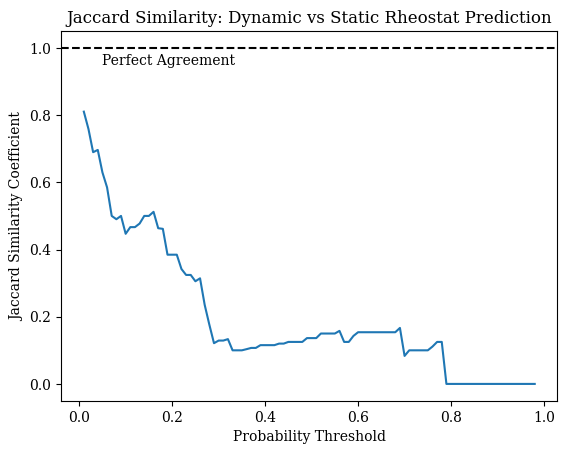

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have two dataframes: df1 and df2

# Create an empty array to store the Jaccard similarity coefficients
jaccard_values = []

# Define the threshold range and increment
threshold_range = np.arange(0.01, 1.01, 0.01)

# Iterate over each threshold value
for threshold in threshold_range:
    # Binarize the dataframes based on the threshold value
    df1_binary = df1rem['Prob2'] > threshold
    df2_binary = df2rem['Prob2'] > threshold
    
    # Calculate the Jaccard similarity coefficient
    intersection = np.sum(df1_binary & df2_binary)
    union = np.sum(df1_binary | df2_binary)
    jaccard_coefficient = intersection / union
    
    # Append the coefficient to the array
    jaccard_values.append(jaccard_coefficient)

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'serif'    
    
# Plot the Jaccard similarity coefficients
plt.plot(threshold_range, jaccard_values)
plt.axhline(y=1, color='black', linestyle='--')
plt.text(0.05, 0.95, 'Perfect Agreement')
plt.xlabel('Probability Threshold')
plt.ylabel('Jaccard Similarity Coefficient')
plt.title('Jaccard Similarity: Dynamic vs Static Rheostat Prediction')
# Save the figure as a PNG file
plt.savefig('jaccard_plot_rheo_prediction.png', dpi=800)
plt.show()


Logistic: ROC AUC=0.949


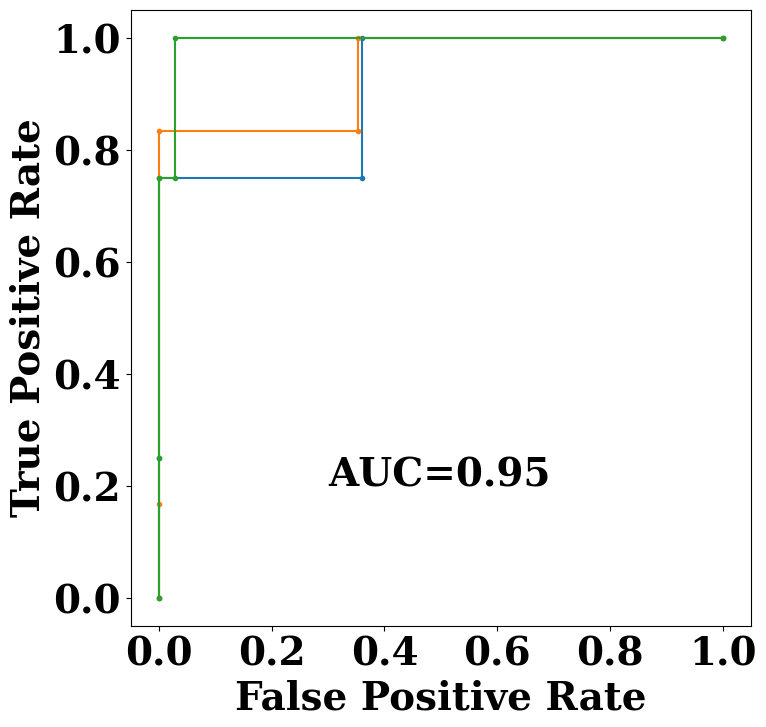

Train Accuracy : 0.95
Test Accuracy : 1.00


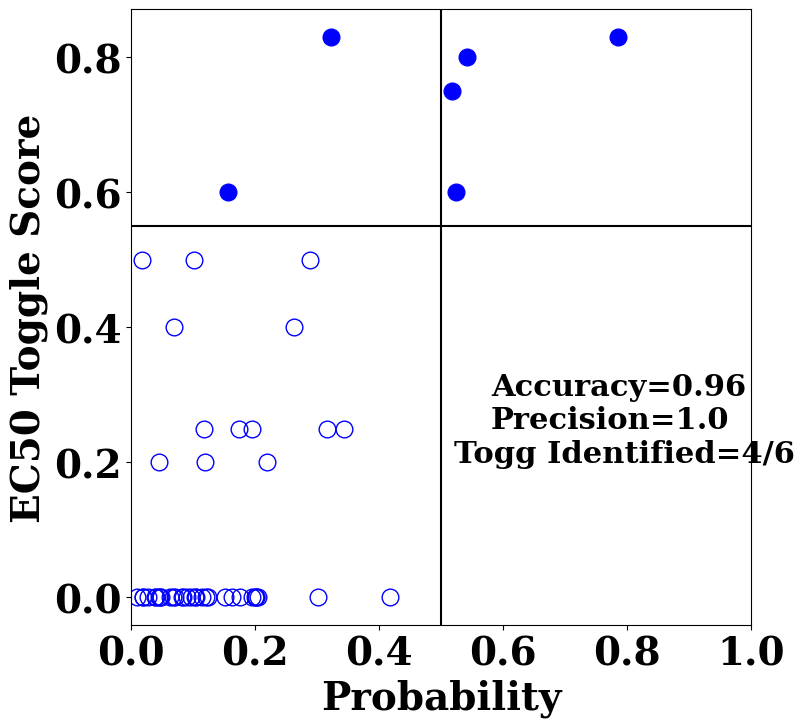

In [34]:

TPR=[]
FPR=[]
TNR=[]
FNR=[]
#C1 = dylistT
C1 = netlistT
C2 = ['TEC50label']


data = DFVRNT[C1]
y = DFVRNT[C2]
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)


iters=500
nfpr = []
ntpr = []
lfpr = []
ltpr = []
lrauc = []
for i in range(1,iters+1):
    Xt, Xv, Yt, Yv = train_test_split(X, y, test_size=0.20)
    Y_train = Yt
    X_train = Xt
    ns_probs = [0 for _ in range(len(Y_train))]
    
    LR = LogisticRegression(solver='liblinear', multi_class='ovr')
    LR.fit(X_train, Y_train)
    
    lr_probs = LR.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(Y_train, ns_probs)
    lr_auc = roc_auc_score(Y_train, lr_probs)
    # summarize scores
    #print('Logistic: ROC AUC=%.3f' % (lr_auc))
    lrauc.append(lr_auc)
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(Y_train, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y_train, lr_probs)
    nfpr.append(ns_fpr)
    ntpr.append(ns_tpr)
    lfpr.append(lr_fpr)
    ltpr.append(lr_tpr)

print('Logistic: ROC AUC=%.3f' % (np.mean(lrauc)))
auctxt = np.round(np.mean(lrauc),decimals=2)
fig = plt.figure(figsize=(8, 8))

pyplot.plot(lfpr[0], ltpr[0], marker='.', label='Logistic1')
pyplot.plot(lfpr[1], ltpr[1], marker='.', label='Logistic2')
pyplot.plot(lfpr[2], ltpr[2], marker='.', label='Logistic3')
# axis labels
pyplot.xlabel('False Positive Rate', fontproperties=ticks_font4)
pyplot.ylabel('True Positive Rate', fontproperties=ticks_font4)
plt.yticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.xticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.text(0.3, 0.2, 'AUC=%s'%(auctxt), fontname = "serif", fontsize=28, fontweight='bold')

# show the plot
#plt.savefig('TEC50_stfeats_AUC.svg')
pyplot.show()

LR = LogisticRegression(solver='liblinear', multi_class='ovr')
LR.fit(X_train, Y_train)
print('Train Accuracy : %.2f'%LR.score(X_train, Y_train))
print('Test Accuracy : %.2f'%LR.score(Xv, Yv))

#data2 = DFVrem[C1]
#y = DFVRNT[C2]
#scaler = StandardScaler()
#scaler.fit(data2)
#X2 = scaler.transform(data2)

iters=1000
allprob=[]
allprob2=[]
allcoef=[]
for i in range(1,iters+1):
    Xt, Xv, Yt, Yv = train_test_split(X, y, test_size=0.20)
    Y_train=Yt
    X_train = Xt
    
    LR = LogisticRegression(solver='liblinear', multi_class='ovr')
    LR.fit(X_train, Y_train)
    Prob=[]
    coef=[]
    for i in range(len(X)):
        #xx = DFtest.loc[DFtest['ResI']==i][DDF_features]
        #x=xx.values[0]
        log_odds = sum(LR.coef_[0] * X[i])+LR.intercept_[0]
        y_pred_proba = sigmoid(log_odds)
        Prob.append(y_pred_proba)
        coef.append(LR.coef_[0])
   # Prob2=[]
   # for i in range(len(X2)):
        #xx = DFtest.loc[DFtest['ResI']==i][DDF_features]
        #x=xx.values[0]
   #     log_odds = sum(LR.coef_[0] * X2[i])+LR.intercept_[0]
   #     y_pred_proba = sigmoid(log_odds)
   #     Prob2.append(y_pred_proba)
    allcoef.append(coef)
    allprob.append(Prob)
   # allprob2.append(Prob2)

coefval = np.mean(allcoef, axis=0)
#DFVrem['Prob2'] = np.mean(allprob2, axis=0)
DFVRNT['Prob'] = np.mean(allprob, axis=0)

P1 = DFVRNT.loc[DFVRNT['Prob']>=0.5]
P0 = DFVRNT.loc[DFVRNT['Prob']<0.5]
            
acc1=len(P1.loc[P1['TEC50label']==1])
acc2=len(P0.loc[P0['TEC50label']==0])
accx1=len(P1.loc[P1['TEC50label']==0])
accx2=len(P0.loc[P0['TEC50label']==1])
accuracy = np.round(((acc1+acc2)/(acc1+acc2+accx1+accx2)), decimals=2)
precision = np.round(((acc1)/(acc1+accx1)), decimals=2)

fig = plt.subplots(figsize=(8, 8))

DFVRNT1 = DFVRNT.loc[DFVRNT['TEC50label']==1]
DFVRNT2 = DFVRNT.loc[DFVRNT['TEC50label']==0]
plt.plot(DFVRNT1['Prob'], np.round(DFVRNT1['TEC50'], decimals=2),'bo', markersize=12)
plt.plot(DFVRNT2['Prob'], np.round(DFVRNT2['TEC50'], decimals=2),'bo', mfc='none',markersize=12)

plt.xlabel('Probability', fontproperties=ticks_font4)
plt.ylabel('EC50 Toggle Score', fontproperties=ticks_font4)
#plt.axhline(0.3, color='black')
plt.axhline(0.55, color='black')
plt.axvline(0.5, color='black')
plt.xlim(0,1)
plt.yticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.xticks(fontname = "serif", fontsize=28, fontweight='bold')
plt.text(0.58, 0.3, 'Accuracy=%s'%(accuracy), fontname = "serif", fontsize=22, 
         fontweight='bold')
plt.text(0.58, 0.25, 'Precision=%s'%(precision), fontname = "serif", fontsize=22, 
         fontweight='bold')
plt.text(0.52, 0.2, 'Togg Identified=%s/6'%(acc1), fontname = "serif", fontsize=22, 
         fontweight='bold')

#plt.savefig('TEC50_stfeats_prob.svg')
plt.show()


## Coefficient eval

In [35]:
dyteval = pd.DataFrame(coefval[0], columns=['Coef'])
dyteval['feats'] = netlistT
dyteval

,Coef,feats
0,0.203189,AvgNeighDegr
1,0.376651,delEigenvecr
2,-0.657143,DegreeBr
3,0.076576,EigenvecBr
4,-0.540352,delAvgNeighDegr
5,0.277162,BetweennessB
6,0.244864,BetweennessBr
7,-0.550672,Eccentricityr
8,-0.164129,Eccentricity
9,0.368722,Closeness


In [27]:
np.corrcoef([DDFRNT['Prob'].values,DDFRNT['EC50min'].values])

array([[1.        , 0.00266482],
       [0.00266482, 1.        ]])

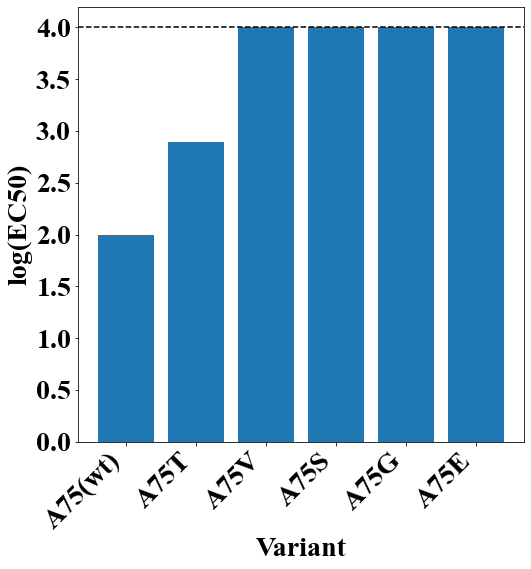

In [336]:
fig = plt.subplots(figsize=(8, 8))
data = [1.995,2.892,4,4,4,4]
labels = ['A75(wt)', 'A75T', 'A75V', 'A75S', 'A75G', 'A75E']
plt.bar(range(len(data)), data) 
plt.xticks(range(len(data)), labels, fontname = "Times New Roman", fontsize=28, fontweight='bold',rotation=45, ha='right')
plt.yticks(fontname = "Times New Roman", fontsize=28, fontweight='bold')
plt.xlabel('Variant', fontproperties=ticks_font4)
plt.ylabel('log(EC50)', fontproperties=ticks_font4)
plt.axhline(4.0, color='black', ls='--')
plt.savefig('A75_toggle.svg')
plt.show()


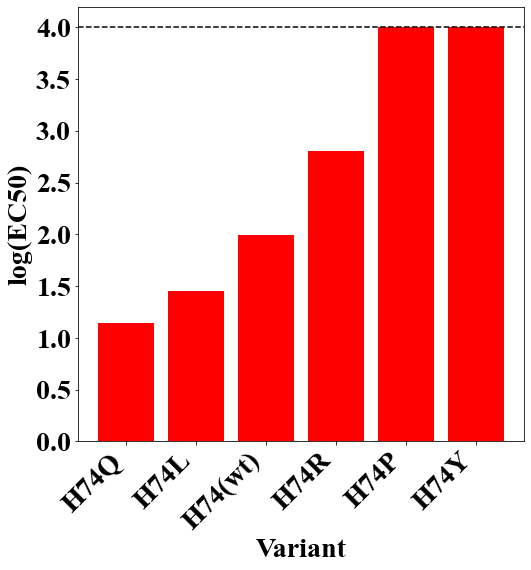

In [337]:
fig = plt.subplots(figsize=(8, 8))
data = [1.1423,1.455,1.995,2.8095,4,4]


labels = ['H74Q', 'H74L', 'H74(wt)','H74R','H74P','H74Y']
plt.bar(range(len(data)), data, color='red') 
plt.xticks(range(len(data)), labels, fontname = "Times New Roman", fontsize=28, fontweight='bold',rotation=45, ha='right')
plt.yticks(fontname = "Times New Roman", fontsize=28, fontweight='bold')
plt.xlabel('Variant', fontproperties=ticks_font4)
plt.ylabel('log(EC50)', fontproperties=ticks_font4)
plt.axhline(4.0, color='black', ls='--')
plt.savefig('A74_rheostat.svg')
plt.show()


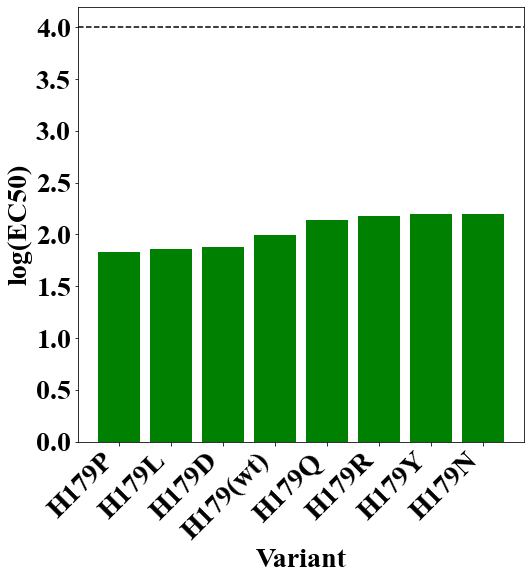

In [338]:
fig = plt.subplots(figsize=(8, 8))
data = [1.832421372,1.860577364,1.879946696,1.99549,2.135109141,2.173732342,2.194854609,2.196987869]

labels = ['H179P', 'H179L', 'H179D','H179(wt)','H179Q','H179R','H179Y','H179N']
plt.bar(range(len(data)), data, color='green') 
plt.xticks(range(len(data)), labels, fontname = "Times New Roman", fontsize=28, fontweight='bold',rotation=45, ha='right')
plt.yticks(fontname = "Times New Roman", fontsize=28, fontweight='bold')
plt.xlabel('Variant', fontproperties=ticks_font4)
plt.ylabel('log(EC50)', fontproperties=ticks_font4)
plt.axhline(4.0, color='black', ls='--')
plt.savefig('A179_neutral.svg')
plt.show()


## Neural Net Testing

In [69]:
df = pd.DataFrame(DDFRNT['WREC50'],columns={'WREC50'})
df[DDFRNT[dylistR].columns]=DDFRNT[DDFRNT[dylistR].columns].values

In [70]:
input_data = df.iloc[:, 1:] 
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a custom function to normalize each cell
def normalize_cell(cell):
    scaler = StandardScaler()
    cell_norm = scaler.fit_transform(np.array(cell).reshape(-1, 1)).flatten()
    return cell_norm.tolist()

# Apply the normalization function to each cell in the input data
#input_data_norm = input_data.applymap(normalize_cell)
scaler = StandardScaler()
scaler.fit(input_data)
input_data_norm = scaler.transform(input_data)

In [71]:
df[df.columns[1:1000]] = input_data_norm

In [77]:
import torch
import torch.nn as nn
import numpy as np

# Define the neural network model
class RheoNet(nn.Module):
    def __init__(self):
        super(RheoNet, self).__init__()
        self.fc1 = nn.Linear(12, 8) # 140000 input features, 256 output feature
        self.fc2 = nn.Linear(8, 4) # 256 input features, 64 output features
        self.fc3 = nn.Linear(4, 1) # 64 input features, 1 output feature

    def forward(self, x):
        x = x.view(-1, 12) # Reshape the input to be a vector
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [75]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of the resulting DataFrames to verify the split
print('Training set shape:', train_df.shape)
print('Validation set shape:', val_df.shape)

Training set shape: (110, 13)
Validation set shape: (28, 13)


In [78]:
model = RheoNet()
# Instantiate the neural network model
import torch.nn.init as init

# Initialize weights using Xavier initialization
init.xavier_uniform_(model.fc1.weight)
init.xavier_uniform_(model.fc2.weight)

import torch.optim as optim

# Mean square error for regression tasks 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.001)

# Cross Entropy for binary classifications
#criterion = nn.BCELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.001)

# Train the neural network
num_epochs = 1000
batch_size = 12
num_batches = (len(train_df) - 1) // batch_size + 1
zeroing_prob = 0.1  # probability of zeroing out an input feature

for epoch in range(num_epochs):
    running_loss = 0.0
    # Shuffle the indices of the data
    indices = np.random.permutation(len(train_df))
    for i in range(num_batches):
        # Get a batch of input data and labels
        batch_indices = indices[i*batch_size:(i+1)*batch_size]
        batch_inputs = [list(train_df.iloc[j,1:]) for j in batch_indices]
        batch_inputs = torch.tensor(batch_inputs, dtype=torch.float32)
        batch_labels = torch.tensor(train_df.iloc[batch_indices, 0].values, dtype=torch.float32)
        batch_labels = batch_labels.unsqueeze(1)  # Add an extra dimension to match the output tensor
        
        # Zero out input features with a certain probability
        mask = (torch.rand(batch_inputs.shape) > zeroing_prob).float()
        batch_inputs = batch_inputs * mask
        
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_inputs)

        # Compute the loss
        loss = criterion(outputs, batch_labels)

        # Add weight decay to the loss
        l2_reg = None
        for param in model.parameters():
            if l2_reg is None:
                l2_reg = param.norm(2)
            else:
                l2_reg = l2_reg + param.norm(2)
        loss = loss + 0.001 * l2_reg

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

    # Print the average loss for this epoch
    if epoch == 0 or (epoch + 1) % 25 == 0:
        avg_loss = running_loss / num_batches
        print(f"Epoch {epoch + 1} - Average Loss: {avg_loss:.5f}")

Epoch 1 - Average Loss: 0.29989
Epoch 25 - Average Loss: 0.10940
Epoch 50 - Average Loss: 0.09865
Epoch 75 - Average Loss: 0.08885
Epoch 100 - Average Loss: 0.07416
Epoch 125 - Average Loss: 0.06167
Epoch 150 - Average Loss: 0.06362
Epoch 175 - Average Loss: 0.05499
Epoch 200 - Average Loss: 0.05662
Epoch 225 - Average Loss: 0.04671
Epoch 250 - Average Loss: 0.04995
Epoch 275 - Average Loss: 0.04330
Epoch 300 - Average Loss: 0.04382
Epoch 325 - Average Loss: 0.04422
Epoch 350 - Average Loss: 0.03677
Epoch 375 - Average Loss: 0.03751
Epoch 400 - Average Loss: 0.03952
Epoch 425 - Average Loss: 0.03823
Epoch 450 - Average Loss: 0.04437
Epoch 475 - Average Loss: 0.03634
Epoch 500 - Average Loss: 0.03282
Epoch 525 - Average Loss: 0.03343
Epoch 550 - Average Loss: 0.03470
Epoch 575 - Average Loss: 0.03458
Epoch 600 - Average Loss: 0.03154
Epoch 625 - Average Loss: 0.03150
Epoch 650 - Average Loss: 0.03712
Epoch 675 - Average Loss: 0.03608
Epoch 700 - Average Loss: 0.03582
Epoch 725 - Average

In [ ]:
model.eval()  # switch to evaluation mode
val_loss = 0.0
val_mae = 0.0
val_total = 0
val_outputs = []
val_labels = []

with torch.no_grad():
    for i in range(len(val_df)):
        # Get input data and label for one example
        inputs = torch.tensor(val_df.iloc[i,1:].values, dtype=torch.float32)
        label = torch.tensor(val_df.iloc[i,0], dtype=torch.float32)

        # Zero out input features with zeroing probability of 0
        mask = torch.ones_like(inputs)
        inputs = inputs * mask

        # Make prediction and update MAE and loss
        output = model(inputs)
        val_loss += criterion(output, label).item()
        val_mae += torch.abs(output - label).item()
        val_total += 1

        # Append predicted value and true label to lists
        val_outputs.append(output.item())
        val_labels.append(label.item())

val_mae /= val_total
val_loss /= val_total
print('Validation MAE: %.3f, Validation loss: %.3f' % (val_mae, val_loss))

# Create DataFrame to display predicted values and true labels side by side
val_df2 = pd.DataFrame({'predicted': val_outputs, 'true label': val_labels})
print(val_df2.head(20))

## Automated LR code for EC50 IPTG max / min ##

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def run_logistic_regression(data, feature1, meta_list, classification_col,iterX=500):
    #feature_list = np.hstack([feature1,meta_list])
    feature_list=np.array(feature1)
    scaler = StandardScaler()
    scaler.fit(data[feature_list].values.reshape(-1,1))
    X = scaler.transform(data[feature_list].values.reshape(-1,1))
    y = data[classification_col]

    iters = iterX
    all_prob = []
    cef_coef = []
    for i in range(1, iters + 1):
        Xt, Xv, Yt, Yv = train_test_split(X, y, test_size=0.20)
        Y_train = Yt
        X_train = Xt

        LR = LogisticRegression(solver='liblinear', multi_class='ovr')
        LR.fit(X_train, Y_train)
        Prob = []
        coef = []
        for i in range(len(X)):
            log_odds = sum(LR.coef_[0] * X[i]) + LR.intercept_[0]
            y_pred_proba = sigmoid(log_odds)
            Prob.append(y_pred_proba)
            coef.append(LR.coef_[0])
        all_prob.append(Prob)
        cef_coef.append(coef)

    data['Prob1'] = np.mean(all_prob, axis=0)
    Prob1 = data['Prob1'].values
    CoefCEF = np.mean(cef_coef, axis=0)
    P1 = data.loc[data['Prob1'] >= 0.5]
    P0 = data.loc[data['Prob1'] < 0.5]
    C1 = data.loc[data[classification_col] == 1]
    C0 = data.loc[data[classification_col] == 0]

    probs = C1['Prob1'].values
    probsum = np.round(np.sum(probs), decimals=3)
    probmin = np.round(np.min(probs), decimals=3)

    acc1 = len(P1.loc[P1[classification_col] == 1])
    acc2 = len(P0.loc[P0[classification_col] == 0])
    accx1 = len(P1.loc[P1[classification_col] == 0])
    accx2 = len(P0.loc[P0[classification_col] == 1])

    acc12 = acc1 + acc2
    accurC = np.round(np.float(acc12) / np.float(len(data)), decimals=3)

    TPRC = np.round(np.float(len(P1) / len(C1)), decimals=3)
    FPRC = np.round(np.float(len(P0) / len(C0)), decimals=3)

    results_dict = {
        'psum': probsum,
        'pmin': probmin,
        'TP': acc1,
        'FP': accx1,
        'TN': acc2,
        'FN': accx2,
        'Accuracy': accurC,
        'Feat': feature1
        }
    return results_dict


In [40]:
len(DDFRNT.loc[DDFRNT['delEC50min_label1'] == 1])

37

In [ ]:
import csv

# Step 1: Initialize the feature lists
flist_ec50min = []
#DFTemp = pd.read_csv('TEM1_prob_coef_ranking.csv')
feat_ec50min = DDFRNT_newfeat
IX= 200

# Step 2: Set the maximum accuracy
max_accuracy = 1.00

# Step 3: Define a function to calculate the metrics
def calculate_metrics(flist_ec50min):
    results_list = []
    for feature1 in feat_ec50min:
        results_dict = run_logistic_regression(DDFRNT, feature1, flist_ec50min, 'delEC50min_label1', IX)
        results_list.append(results_dict)
++
    # Convert results list to a dataframe
    df = pd.DataFrame(results_list)

    # Find the row with the highest TP
    best_feature = df.loc[df['Accuracy'].idxmax()]
    best_pmin = df.loc[df['pmin'].idxmax()]

    # Find the row with 100% accuracy
    accuracy_df = df.loc[df['Accuracy'] == 1]

    # Find the row with the least number of FNs
    min_fn_df = df.loc[df['FN'].idxmin()]

    # Find the rows with 0, 1, and 2 FNs
    zero_fn_df = df.loc[df['FN'] == 0]
    one_fn_df = df.loc[df['FN'] == 1]
    two_fn_df = df.loc[df['FN'] == 2]

    # Return the relevant metrics
    return {'bfeat': best_feature['Feat'], 
            'TP': best_feature['TP'], 
            'FP': best_feature['FP'],
            'psum': best_feature['psum'],
            'pmin': best_feature['pmin'],
            'pminX': best_pmin['pmin'],
            'Accuracy': best_feature['Accuracy'], 
            'min_FN_feature': min_fn_df['Feat'], 
            'zero_FN_features': zero_fn_df['Feat'].tolist(), 
            'one_FN_features': one_fn_df['Feat'].tolist(), 
            'two_FN_features': two_fn_df['Feat'].tolist()}



max_accuracy = 0.0
max_psum = 0.0
consecutive_no_improvement = 0
with open('LacI_IPTG_ec50min_featlist.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['Feature List', 'TP', 'Accuracy'])
    
    # Step 6: Initialize flist_ec50min with the feature that has the highest TP
    best_feature = calculate_metrics(flist_ec50min)
    flist_ec50min = [best_feature['bfeat']]
    writer.writerow([flist_ec50min, best_feature['TP'], best_feature['Accuracy']])
    max_accuracy = best_feature['Accuracy']
    max_psum = best_feature['psum']
    best_result = best_feature
    
    while True:
        # Step 7: Loop until 100% accuracy is achieved or no improvement in accuracy is seen for 5 consecutive iterations
        if max_accuracy == 1.0 or consecutive_no_improvement == 5:
            break

        # Step 8: Iterate over all features and find the feature that maximizes the accuracy while minimizing FP
        for feat in feat_ec50min:
            if feat not in flist_ec50min:
                new_flist_ec50min = flist_ec50min + [feat]
                new_result = calculate_metrics(new_flist_ec50min)
                feat_ec50min = feat_ec50min[feat_ec50min != feat]
                if (new_result['Accuracy'] > best_result['Accuracy']) or (new_result['TP'] >= best_result['TP'] and new_result['FP'] <= best_result['FP']):
                    best_result = new_result
                    feat1 = best_result['bfeat']
                    flist_ec50min.append(feat1)
                    consecutive_no_improvement += 0
                    print("Added feature", feat1, "- Number of features:", len(flist_ec50min), "- TP:", best_result['TP'], "- FP:", best_result['FP'], "- Accuracy:", best_result['Accuracy'], "- pmin:", best_result['pmin'])
                    writer.writerow([flist_ec50min, best_result['TP'], best_result['Accuracy']])
                    feat_ec50min = np.delete(feat_ec50min, np.where(feat_ec50min == feat1))
                elif (new_result['pmin'] >= best_result['pmin'] and new_result['TP'] >= best_result['TP']):
                    best_result = new_result
                    feat1 = best_result['bfeat']
                    flist_ec50min.append(feat1)
                    consecutive_no_improvement += 0
                    print("Added feature", feat1, "- Number of features:", len(flist_ec50min), "- TP:", best_result['TP'], "- FP:", best_result['FP'], "- Accuracy:", best_result['Accuracy'], "- pmin:", best_result['pmin'])
                    writer.writerow([flist_ec50min, best_result['TP'], best_result['Accuracy']])
                    feat_ec50min = np.delete(feat_ec50min, np.where(feat_ec50min == feat1))
                #elif feat not in flist_ec50min:
                #    best_result = new_result
                #    feat1 = best_result['bfeat']
                    #flist_ec50min.append(feat1)
                    #print("Added feature", feat1, "- Number of features:", len(flist_ec50min), "- TP:", best_result['TP'], "- FP:", best_result['FP'], "- Accuracy:", best_result['Accuracy'], "- pmin:", best_result['pmin'])
                    #writer.writerow([flist_ec50min, best_result['TP'], best_result['Accuracy']])
                #    consecutive_no_improvement += 1
                    #feat_ec50min = np.delete(feat_ec50min, np.where(feat_ec50min == feat1))
                else:
                    consecutive_no_improvement += 1
    print("Final feature list:", flist_ec50min)
flist_ec50min_full = flist_ec50min


Added feature 291Intra_w - Number of features: 2 - TP: 23 - FP: 12 - Accuracy: 0.812 - pmin: 0.036
